In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

C:\Users\kiyak\AppData\Local\Temp\ipykernel_14528\3568852742.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data_train = pd.read_csv("train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_train[['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                        'FullBath', 'HalfBath', 'GarageCars', 'GarageArea', 'GrLivArea', 'TotRmsAbvGrd', 'SalePrice']].corr()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,GarageCars,GarageArea,GrLivArea,TotRmsAbvGrd,SalePrice
OverallQual,1.000000,-0.091932,0.572323,0.550684,0.411876,0.537808,0.476224,0.295493,0.550600,0.273458,0.600671,0.562022,0.593007,0.427452,0.790982
OverallCond,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.171098,-0.144203,0.028942,-0.194149,-0.060769,-0.185758,-0.151521,-0.079686,-0.057583,-0.077856
YearBuilt,0.572323,-0.375983,1.000000,0.592855,0.315707,0.391452,0.281986,0.010308,0.468271,0.242656,0.537850,0.478954,0.199010,0.095589,0.522897
YearRemodAdd,0.550684,0.073741,0.592855,1.000000,0.179618,0.291066,0.240379,0.140024,0.439046,0.183331,0.420622,0.371600,0.287389,0.191740,0.507101
MasVnrArea,0.411876,-0.128101,0.315707,0.179618,1.000000,0.363936,0.344501,0.174561,0.276833,0.201444,0.364204,0.373066,0.390857,0.280682,0.477493
TotalBsmtSF,0.537808,-0.171098,0.391452,0.291066,0.363936,1.000000,0.819530,-0.174512,0.323722,-0.048804,0.434585,0.486665,0.454868,0.285573,0.613581
1stFlrSF,0.476224,-0.144203,0.281986,0.240379,0.344501,0.819530,1.000000,-0.202646,0.380637,-0.119916,0.439317,0.489782,0.566024,0.409516,0.605852
2ndFlrSF,0.295493,0.028942,0.010308,0.140024,0.174561,-0.174512,-0.202646,1.000000,0.421378,0.609707,0.183926,0.138347,0.687501,0.616423,0.319334
FullBath,0.550600,-0.194149,0.468271,0.439046,0.276833,0.323722,0.380637,0.421378,1.000000,0.136381,0.469672,0.405656,0.630012,0.554784,0.560664
HalfBath,0.273458,-0.060769,0.242656,0.183331,0.201444,-0.048804,-0.119916,0.609707,0.136381,1.000000,0.219178,0.163549,0.415772,0.343415,0.284108


In [6]:
X_train = data_train[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF",
                       "WoodDeckSF", "FullBath", "GarageCars", "GarageArea", "GrLivArea", 
                       "TotRmsAbvGrd"]]
Y_train = data_train[["SalePrice"]].values

In [7]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.2)

In [8]:
X_train.shape, Y_train.shape

((1168, 11), (1168, 1))

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="mse")

In [11]:
output = model.fit(X_train, Y_train,  epochs=300)

Epoch 1/300

37/37 [==============================] - 1s 3ms/step - loss: 39530881024.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 37885071360.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 32364140544.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 18413363200.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 4864964096.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 3449374976.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 3357985792.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 3303887872.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 3233296896.0000
Epoch 10/300
37/37 [==============================] - 0s 2ms/step - loss: 3188806912.0000
Epoch 11/300
37/37 [==============================] - 0s 2ms/step - loss: 3107989248.0000
Epoch 12/300
3

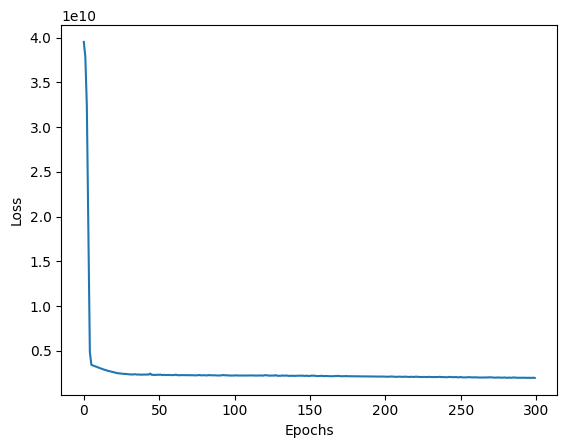

In [14]:
plt.plot(output.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [13]:
loss = model.evaluate(X_validation, Y_validation)
math.sqrt(loss)

10/10 [==============================] - 0s 2ms/step - loss: 1072017024.0000


32741.671063035254

In [382]:
# model.save("my_model.h5")

In [2]:
model = tf.keras.models.load_model("my_model.h5")